- mostly used for categorical column  with "Missing word"
- in case of numerical data it can be any no (-1,0,99, etc)

## Benefit
- easy to apply
## Disadvantage
- same as previous one
- distortion of pdf
- var changes
- cov and corr with other columns
## when to use
- when data is not missing at random

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [26]:
df = pd.read_csv(r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\Dataset\titanic_toy.csv")

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [28]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [30]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_99'] = X_train['Fare'].fillna(99)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [31]:
print("Varience of age in original data is:",X_train['Age'].var())
print("Variance of age for mean is: ",X_train['Age_99'].var())
print("Variance of age for median is:", X_train['Age_minus1'].var())

print("Varience of fare in original data is:", X_train['Fare'].var())
print("Varience of fare for mean is:", X_train['Fare_99'].var())
print("Variance of fare for median is:", X_train['Fare_minus1'].var())

Varience of age in original data is: 210.4528692463678
Variance of age for mean is:  917.6372579490381
Variance of age for median is: 319.3288446599537
Varience of fare in original data is: 2378.850836641955
Varience of fare for mean is: 2475.3181237982662
Variance of fare for median is: 2308.7854503944995


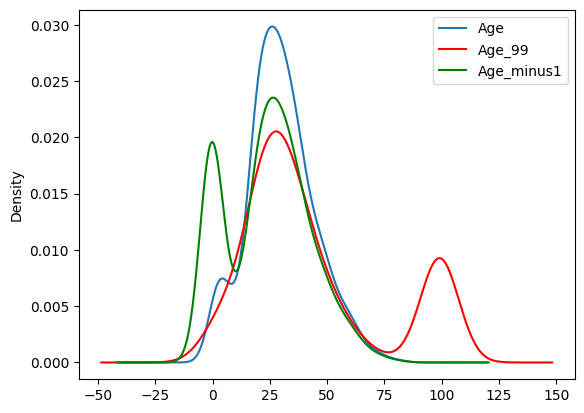

In [32]:
fig = plt.figure()
ax =fig.add_subplot()

## orginal data
X_train['Age'].plot(kind='kde',ax=ax)

## Mean
X_train['Age_99'].plot(kind='kde',ax=ax,color='r')

#median
X_train['Age_minus1'].plot(kind='kde',ax=ax,color='g')

## add legends
lines,labels =ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

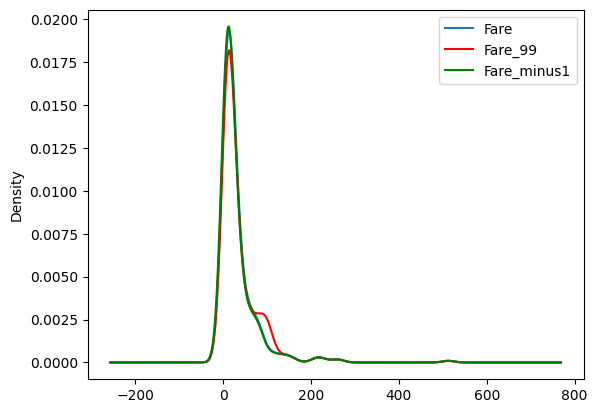

In [33]:
fig = plt.figure()
ax =fig.add_subplot()

## orginal data
X_train['Fare'].plot(kind='kde',ax=ax)

## Mean
X_train['Fare_99'].plot(kind='kde',ax=ax,color='r')

#median
X_train['Fare_minus1'].plot(kind='kde',ax=ax,color='g')

## add legends
lines,labels =ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [23]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
Age,200.168459,100.509104,-6.389653,200.168459,200.168459,96.511223,94.859620
Fare,100.509104,2900.240918,14.376771,-69.996436,144.941510,2900.240918,2900.240918
Family,-6.389653,14.376771,2.253725,-9.339146,-3.319626,13.212233,13.931448
Age_99,200.168459,-69.996436,-9.339146,938.020958,-172.765479,-72.555453,-63.495051
Age_minus1,200.168459,144.941510,-3.319626,-172.765479,303.520284,141.735714,135.957636
Fare_99,96.511223,2900.240918,13.212233,-72.555453,141.735714,2957.351192,2656.622781
Fare_minus1,94.859620,2900.240918,13.931448,-63.495051,135.957636,2656.622781,2814.984035


In [24]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
Age,1.000000,0.124273,-0.311769,1.000000,1.000000,0.118750,0.118939
Fare,0.124273,1.000000,0.176078,-0.042340,0.154490,1.000000,1.000000
Family,-0.311769,0.176078,1.000000,-0.203119,-0.126924,0.161836,0.174907
Age_99,1.000000,-0.042340,-0.203119,1.000000,-0.323785,-0.043562,-0.039075
Age_minus1,1.000000,0.154490,-0.126924,-0.323785,1.000000,0.149601,0.147086
Fare_99,0.118750,1.000000,0.161836,-0.043562,0.149601,1.000000,0.920747
Fare_minus1,0.118939,1.000000,0.174907,-0.039075,0.147086,0.920747,1.000000


In [34]:
##Sklearn
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [36]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [37]:
from sklearn.compose import ColumnTransformer

In [38]:
trf = ColumnTransformer([
    ('age',imputer1,['Age']),
    ('fare',imputer2,['Fare'])
],remainder='passthrough')    

In [39]:
trf.fit(X_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('age',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('fare',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [40]:
trf.named_transformers_['age'].statistics_

array([99.])

In [41]:
trf.named_transformers_['fare'].statistics_

array([999.])

In [42]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)